In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
train_data = pd.read_csv("train.csv")
train_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,58036,18387,2,175,75.0,110,70,1,1,0,0,1,1
1,88981,23328,2,155,66.0,140,90,1,1,1,1,0,0
2,74325,17602,2,168,73.0,120,80,2,1,0,0,1,0
3,16519,23432,2,183,95.0,140,90,1,1,0,0,0,1
4,28981,23162,1,156,62.0,150,80,1,1,0,0,1,1


In [10]:
test_data = pd.read_csv("test.csv")
test_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,36043,17646,2,165,65.0,120,80,1,1,0,0,0,1
1,44455,20418,1,161,77.0,120,70,1,1,0,0,1,1
2,61323,20347,1,165,88.0,120,80,2,2,0,0,1,1
3,27780,18086,2,170,91.0,120,80,3,3,0,0,1,1
4,54273,21791,1,158,67.0,130,80,1,1,0,0,1,1


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58000 entries, 0 to 57999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           58000 non-null  int64  
 1   age          58000 non-null  int64  
 2   gender       58000 non-null  int64  
 3   height       58000 non-null  int64  
 4   weight       58000 non-null  float64
 5   ap_hi        58000 non-null  int64  
 6   ap_lo        58000 non-null  int64  
 7   cholesterol  58000 non-null  int64  
 8   gluc         58000 non-null  int64  
 9   smoke        58000 non-null  int64  
 10  alco         58000 non-null  int64  
 11  active       58000 non-null  int64  
 12  cardio       58000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.8 MB


In [14]:
train_data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<AxesSubplot:xlabel='height'>

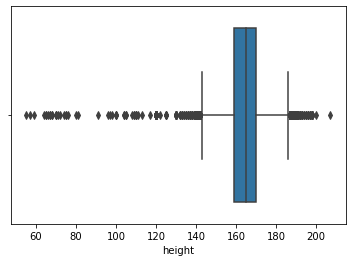

In [20]:
sns.boxplot(x=train_data['height'])

In [12]:
X_train = train_data.drop(columns=['cardio'])
y_train = train_data['cardio']

In [13]:
X_test = test_data.drop(columns=['cardio'])
y_test = test_data['cardio']

# Логистическая регрессия

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression()

In [26]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_predicted_logreg = logreg.predict(X_test)
y_predicted_logreg

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [28]:
y_predicted_logreg[:10]

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [29]:
np.array(y_test)[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

### в некоторых случаях наша модель правильно предсказала СС3, а в некоторых ошиблась.

# Случайный лес (классификация)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators=20, max_depth=10)

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20)

In [36]:
y_predicted_rf = rf.predict(X_test)

In [37]:
y_predicted_rf[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [38]:
np.array(y_test)[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

## Accuracy — это доля правильно угаданных ответов.

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_predicted_logreg, y_test)

0.6948333333333333

In [41]:
accuracy_score(y_predicted_rf, y_test)

0.7320833333333333

## F1 — другая метрика качества бинарной классификации, используемая в машинном обучении.

In [42]:
from sklearn.metrics import f1_score

In [43]:
f1_score(y_predicted_logreg, y_test)

0.6847994491306593

In [44]:
f1_score(y_predicted_rf, y_test)

0.7213313686400277